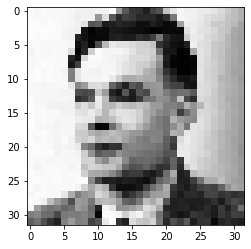

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_DIMS = 32

image = cv2.imread('turing.jpg')   

image = cv2.resize(image, (IMG_DIMS, IMG_DIMS))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap="gray")


In [28]:
import itertools
import random

In [29]:
# global variables
NUM_PARENT_MATING = 4
MUTATION_PERCENT  = 0.1
CHROMOSOME_PER_POPULATION = 16

In [30]:
def image_to_vector(image, img_shape):
    vec = np.reshape(image, img_shape*img_shape)
    return vec
def vector_to_image(vec, img_shape):
    image = np.reshape(vec, (img_shape, img_shape))
    return image

In [31]:
def generate_initial_population(img_shape, num_individuals = 8):
    np.random.seed(1)
    init_pop = np.empty(shape=(num_individuals, img_shape*img_shape),
                        dtype=np.uint8)

    for i in range(num_individuals):
        init_pop[i, :] = np.random.randint(0,256, img_shape*img_shape)
    return init_pop
    

In [32]:
def fitness_values(target, population):
    vals = np.zeros(population.shape[0])
    for (i, chromosome) in zip(range(len(population)), population):
        error = -1 * np.sum(np.abs(target - chromosome))
        vals[i] = error
    
    return vals

In [33]:
def best_parents(population, vals, n=2):
    parents = []
    index = np.argsort(vals)[::-1]
    best_index = index[0:n]
    for i in best_index:
        parents.append(population[i])
    parents = np.array(parents)
    
    return parents

In [34]:
def crossover(parents:np.array, img_shape, num_individuals = 8):
    new_population = np.empty(shape=(num_individuals, img_shape*img_shape), dtype=np.uint8)
    
    new_population[0:parents.shape[0], :] = parents
    
    num_newly_generated = num_individuals = parents.shape[0]
    
    parents_permutations = list(itertools.permutations(iterable=np.arange(0, parents.shape[0]), r = 2))
    
    selected_permutations = random.sample(range(len(parents_permutations)), num_newly_generated)    
    
    comb_idx = parents.shape[0]
    
    for comb in range(len(selected_permutations)):
        selected_comb_idx = selected_permutations[comb]
        selected_comb     = parents_permutations[selected_comb_idx]
        cross_size = np.int32(new_population.shape[1]/ 50)
        new_population[comb_idx+comb, 0:cross_size] = parents[selected_comb[0],0:cross_size]
        new_population[comb_idx+comb, cross_size: ] = parents[selected_comb[1],cross_size: ]
    return new_population

In [35]:
def mutation(population, num_parent_mating, mut_percent):
    for indx in range(num_parent_mating, population.shape[0]):
        rand_indx = np.int32(
            np.random.random(size = np.int32(mut_percent/100 * population.shape[1])) * population.shape[1]
        )
        new_values = np.random.randint(0,256, len(rand_indx))
        population[indx, rand_indx] = new_values
     
    return population

In [36]:
target = image_to_vector(gray_image, IMG_DIMS)
population = generate_initial_population(IMG_DIMS,CHROMOSOME_PER_POPULATION)
for iteration in range(100000):
    vals = fitness_values(target, population)
    parents = best_parents(population, vals, 4)
    population = crossover(parents, IMG_DIMS, CHROMOSOME_PER_POPULATION)
    population = mutation(population, NUM_PARENT_MATING, MUTATION_PERCENT)

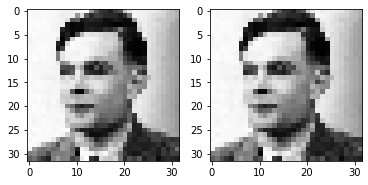

In [37]:
best_solution = population[np.where(vals == np.max(vals))[0][0],: ]
best_solution_image = vector_to_image(best_solution, IMG_DIMS)
plt.subplot(1,2,1).imshow(gray_image, cmap="gray")
plt.subplot(1,2,2).imshow(best_solution_image, cmap="gray")
plt.savefig("result.jpg")

In [38]:
sum(best_solution == target) / IMG_DIMS**2

0.5888671875